# Homework 2
Alexander Chkodrov  
October 13th, 2019

**1\)** Rolling sevens is more likely than rolling snake eyes as there are more combinations that create seven than there are combinations that create snake eyes; There are 6 combinations that create a sum of seven, and 1 combination that creates snake eyes (sum of two). Therefore the ratio of probabilities is 6:1 in favor of rolling sevens.

**2\)** Let $f(x)$ and $g(x)$ represent the probability density functions for the two dice. The probability for each sum of the two dice is represented by the convolution of the two, using a sum as opposed to an integral due to the discrete nature of the functions. The probability of sum $x$ is described by $$P_{A+B}(x) = \sum_z f(z)g(x-z)$$

Solving analytically, find $P_{A+B}(7)$  
$P_{A+B}(7) = \sum_z f(z)g(7-z)$, evaluated over the region $1 \leq z \leq 6$ because those are the bounds for which f(x) and g(x) are non-zero.  
$P_{A+B}(7) = f(1)g(6) + f(2)g(5) + \ldots + f(6)g(1)$
$P_{A+B}(7) = (\frac{1}{6}\times$P_{A+B}(7)$ \frac{1}{6}) + (\frac{1}{6}\times\frac{1}{6}) + \ldots + (\frac{1}{6}\times\frac{1}{6}) = 6\times(\frac{1}{6}\times\frac{1}{6})$  
$P_{A+B}(7) = \frac{1}{6}$


Solving numerically, find $P_{A+B}(7)$

In [126]:
import numpy as np
die = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
sumPmf = np.convolve(die, die)
print(sumPmf)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


Each entry in the array corresponds to the probability of sums 2 through 12, the minimum and maximum possible sums respectively. The fifth entry in the array corresponds to the probability of sum 7 (5 up from sum 2), which the convolution has returned a probability of 1/6.
$\therefore P_{A+B}(7) = 1/6$

**3\)** Calculate the mean and variance of the distribution in problem two

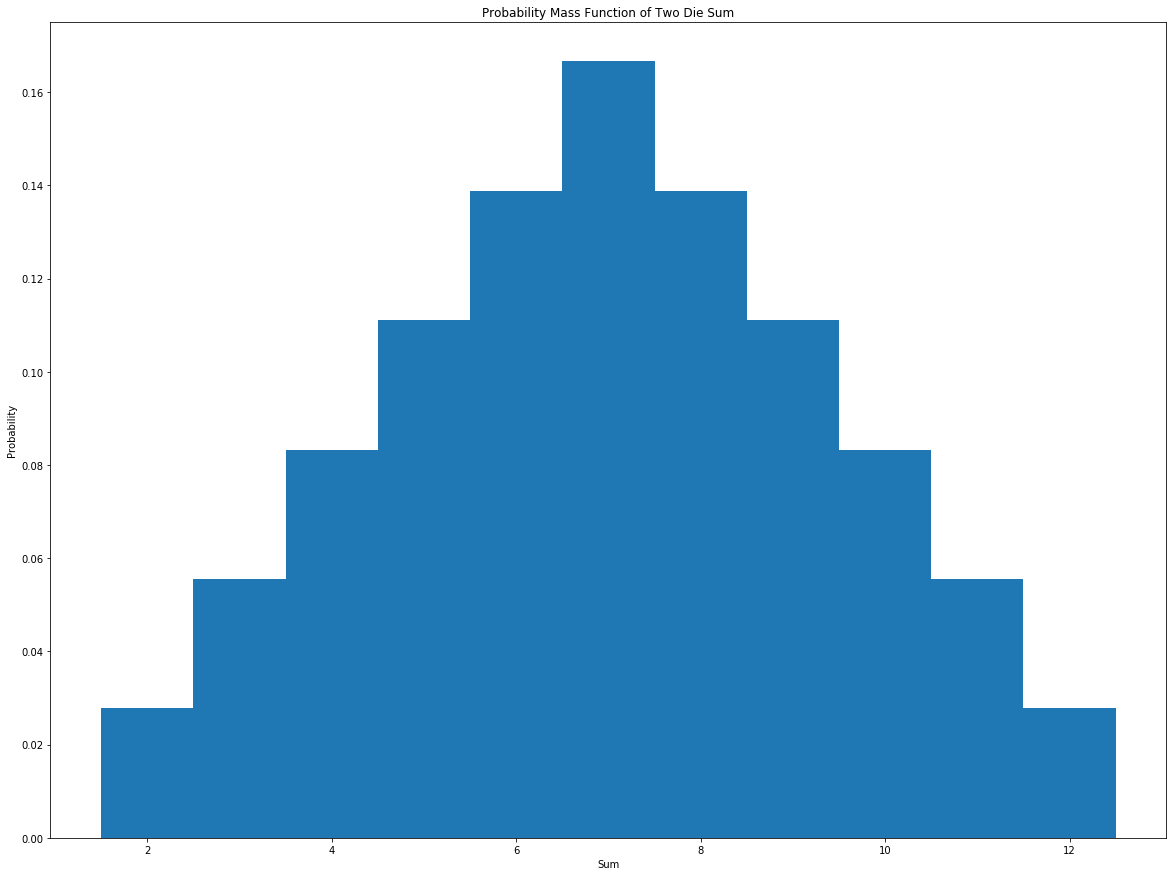

In [127]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

fig = plt.bar(np.arange(2,13), sumPmf, width = 1)
plt.title("Probability Mass Function of Two Die Sum")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.show()

In [128]:
average = np.average(np.arange(2,13), weights=sumPmf)
print(f"Average of Two Die Sum : {average:.3f}")

Average of Two Die Sum : 7.000


Using the formula $Var(X) = E[X^2] - E[X]^2$  
by definition $E[X^2] = \sum x^2p$, and the average is $E[X] = 7$

In [129]:
variance = sum(np.arange(2,13) ** 2 * sumPmf) - average ** 2
print(f"Variance of Two Die Sum : {variance:.3f}")

Variance of Two Die Sum : 5.833


**4)** Graph an average of 10 dice, and explain whether it is a Gaussian distribution.

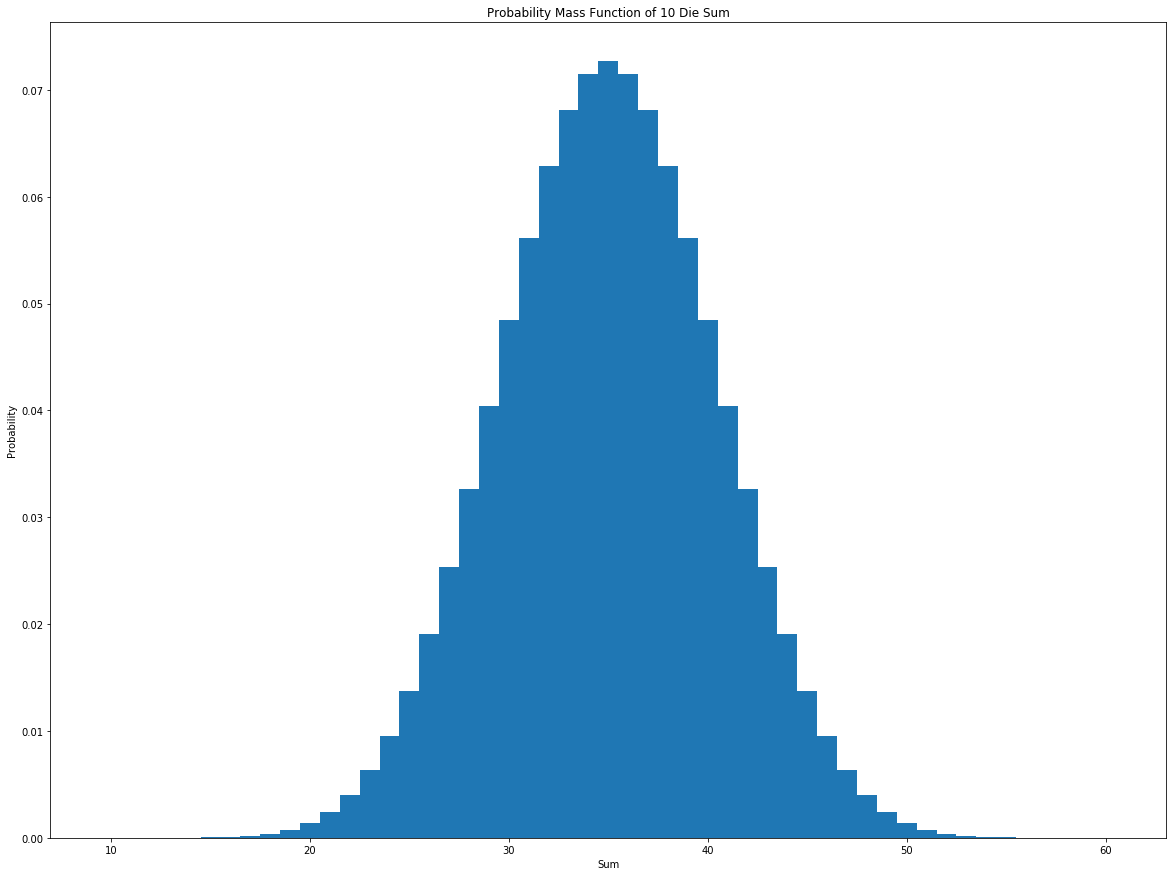

In [130]:
n = 10
die = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
sumPmf = np.convolve(die, die)
for i in range(n-2):
    sumPmf = np.convolve(sumPmf, die)

fig = plt.bar(np.arange(n,6*n+1), sumPmf, width = 1)
plt.title(f"Probability Mass Function of {n} Die Sum")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.show()

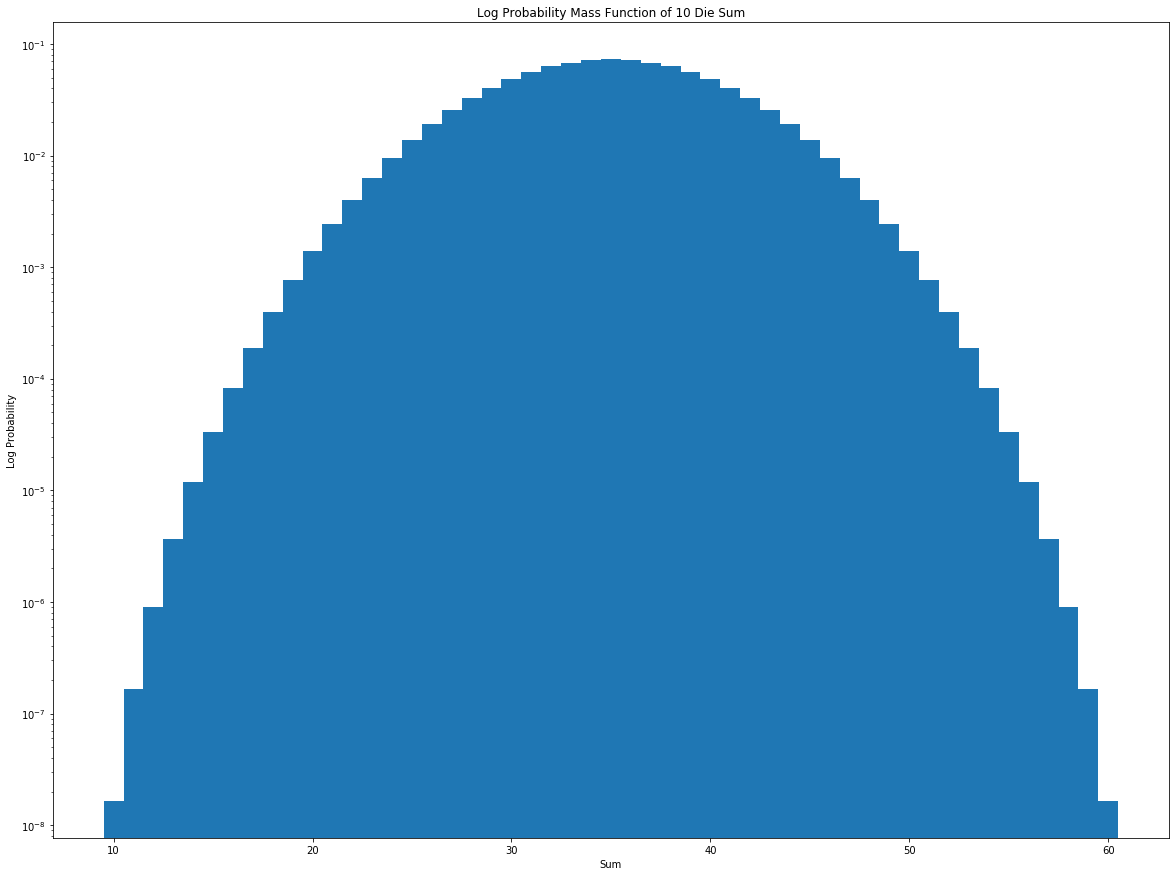

In [131]:
fig = plt.bar(np.arange(n,6*n+1), sumPmf, width = 1)
plt.yscale('log')
plt.title(f"Log Probability Mass Function of {n} Die Sum")
plt.xlabel("Sum")
plt.ylabel("Log Probability")
plt.show()

Looking at the graph of the distribution on a log scale, it follows a parabolic line; based on this it seems safe to assume that the distribution is Gaussian.

**5\)** Show that the sum and average of an initially Gaussian distribution is also Gaussian. How does the standard deviation of the resulting sum or average Gaussian change?

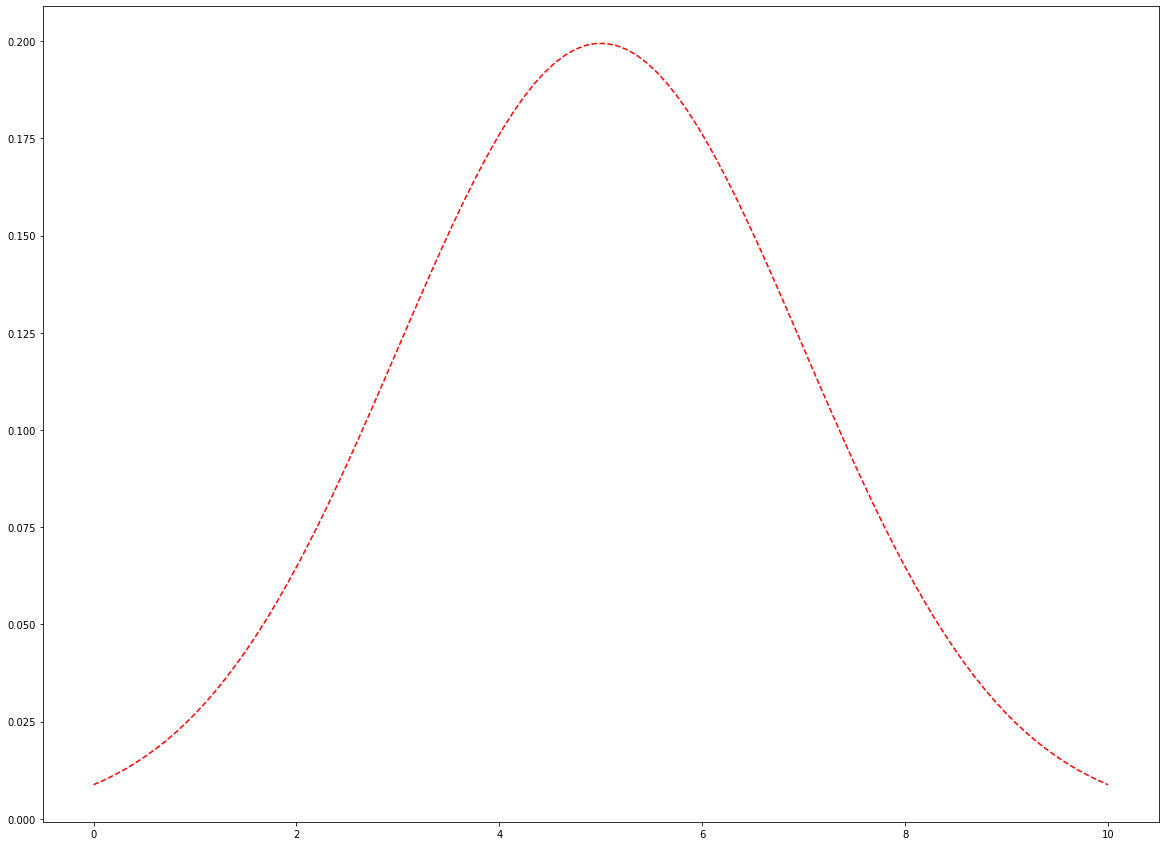

In [132]:
import scipy
from scipy import stats

x = np.linspace(0., 10., 100)
pdf = stats.norm.pdf(x, loc = 5, scale = 2)
fig1 = plt.plot(x, pdf, 'r--')

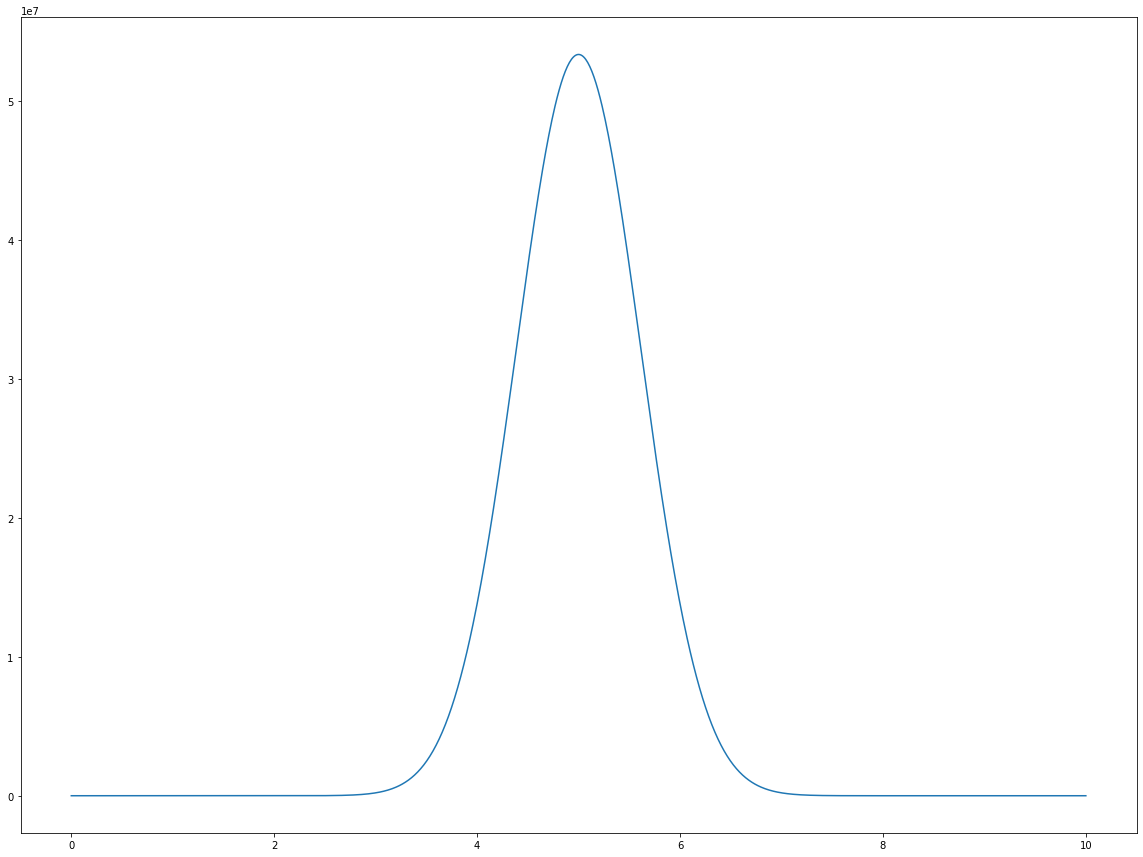

In [133]:
n = 10
sumpdf = pdf
for i in range(n-1):
    sumpdf = np.convolve(sumpdf, pdf)
    
x = np.linspace(0, 10, sumpdf.size)
fig = plt.plot(x, sumpdf)

The above graph in the dotted red line is the original Gaussian distribution with a standard deviation of two, and the graph in the blue line is averaged ten times. While they are both clearly Gaussian, the ten times averaged distribution has much shorter tails and thus has a smaller standard deviation than the first distribution. For the purposes of integrating a signal over time, this implies that the more you collect and average data the more Gaussian and narrow the distribution gets.